<a href="https://colab.research.google.com/github/jdmartinev/MachineLearning/blob/main/Clase01/Notebooks/e_Preprocesamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Semana 1 - Preprocesamiento de datos**

## **Objetivos de aprendizaje**

- Reconocer el impacto de la calidad y cantidad de datos en los algoritmos de ML
- Explicar un proceso típico de recolección y transformación de datos en el flujo de trabajo de ML
- Identificar cuando implementar transformaciones de características como imputación, escalamiento, one-hot-encoding

## **Ejemplo 2: Predicción del precio de casas en California**

En este ejemplo usaremos $k-$NN para predecir el precio de una casa en California.

Intuición:

- Encuentre las casas similares a la casa que queremos vender.
- Asignar el precio de esta casa como el promedio de los precios de las casas cercanas

![Spotify recommendation](https://drive.google.com/uc?id=1rrxAdHfn60FutVb86mTlc-v6sskODA8_)




## **Descarga de datos (opción 1)**

Lo primero que hará será descargar los datos con los que va a trabajar:

- Tabla de datos de clientes (archivo csv).

Este archivo quedará en la ruta _/content/data.csv asociada con el sistema operativo del servidor en el que se está ejecutando google colab.

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1woWEpcwkCYSdRSTfSTT2j17JinrTMJOu' -O housing.csv

--2023-04-11 22:35:07--  https://docs.google.com/uc?export=download&id=1woWEpcwkCYSdRSTfSTT2j17JinrTMJOu
Resolving docs.google.com (docs.google.com)... 173.194.215.138, 173.194.215.101, 173.194.215.102, ...
Connecting to docs.google.com (docs.google.com)|173.194.215.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2adjjgs5ago418hf5jrciphmr2ghnm80/1681252500000/15315348669826032119/*/1woWEpcwkCYSdRSTfSTT2j17JinrTMJOu?e=download&uuid=e4038dea-450f-45af-9adc-1092ee4f5d68 [following]
--2023-04-11 22:35:07--  https://doc-10-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2adjjgs5ago418hf5jrciphmr2ghnm80/1681252500000/15315348669826032119/*/1woWEpcwkCYSdRSTfSTT2j17JinrTMJOu?e=download&uuid=e4038dea-450f-45af-9adc-1092ee4f5d68
Resolving doc-10-6c-docs.googleusercontent.com (doc-10-6c-docs.googleusercontent.com)... 173.194.218.132, 2607:

## **Descarga de datos (opción 2)**

Vincular google colab con google drive

https://www.youtube.com/watch?v=6UnCrulz-fE



## **Importar librerías necesarias**

In [ ]:
import sys
import time

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import HTML

sys.path.append("code/.")

#import mglearn
from IPython.display import display
#from plotting_functions import *


# Preprocessing and pipeline
from sklearn.impute import SimpleImputer

# train test split and cross validation
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)


pd.set_option("display.max_colwidth", 200)

## **Técnicas comunes de pre-procesamiento**

Algunas transformaciones de características comúnmente realizadas incluyen:

- Imputación: abordar valores faltantes
- Escalado: escalar características numéricas
- Codificación one-hot: abordar variables categóricas

¡Podemos tener una lección para cada una de ellas! En esta lección nuestro objetivo es familiarizarnos con ellas para que podamos usarlas para construir frameworks de aprendizaje automático.

In [ ]:
# Cargar los datos
housing_df = pd.read_csv("housing.csv")
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## **Descripción de las columnas**

`longitude`: A measure of how far west a house is; a higher value is farther west

`latitude`: A measure of how far north a house is; a higher value is farther north

`housingMedianAge`: Median age of a house within a block; a lower number is a newer building

`totalRooms`: Total number of rooms within a block

`totalBedrooms`: Total number of bedrooms within a block

`population`: Total number of people residing within a block

`households`: Total number of households, a group of people residing within a home unit, for a block

`medianIncome`: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

`medianHouseValue`: Median house value for households within a block (measured in US Dollars)

`oceanProximity`: Location of the house w.r.t ocean/sea

## **Particiones de entrenamiento, validación y prueba**

In [ ]:
train_df, test_df = train_test_split(housing_df, test_size=0.20, random_state=123)
train_df, val_df = train_test_split(train_df, test_size = 0.20, random_state=123)


## **Creación de nuevas variables**

Vamos a agregar algunas características al dataset que puedan ayudar a predecir la columna objetivo: `median_house_value`





In [ ]:
train_df = train_df.assign(
    rooms_per_household=train_df["total_rooms"] / train_df["households"]
)

val_df = val_df.assign(
    rooms_per_household=val_df["total_rooms"] / val_df["households"]
)

test_df = test_df.assign(
    rooms_per_household=test_df["total_rooms"] / test_df["households"]
)

train_df = train_df.assign(
    bedrooms_per_household=train_df["total_bedrooms"] / train_df["households"]
)

val_df = val_df.assign(
    bedrooms_per_household=val_df["total_bedrooms"] / val_df["households"]
)

test_df = test_df.assign(
    bedrooms_per_household=test_df["total_bedrooms"] / test_df["households"]
)

train_df = train_df.assign(
    population_per_household=train_df["population"] / train_df["households"]
)

val_df = val_df.assign(
    population_per_household=val_df["population"] / val_df["households"]
)

test_df = test_df.assign(
    population_per_household=test_df["population"] / test_df["households"]
)

¿Qué pasa si agregamos estas características antes de hacer la partición en entrenamiento, validación y prueba?

In [ ]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
17854,-121.89,37.46,5.0,1519.0,186.0,705.0,186.0,10.3798,500001.0,<1H OCEAN,8.166667,1.000000,3.790323
10905,-117.86,33.76,15.0,851.0,297.0,1326.0,254.0,2.8289,117500.0,<1H OCEAN,3.350394,1.169291,5.220472
12881,-121.34,38.68,28.0,3379.0,552.0,1543.0,556.0,4.2743,124000.0,INLAND,6.077338,0.992806,2.775180
12280,-116.99,33.92,26.0,503.0,69.0,293.0,59.0,3.7083,147500.0,INLAND,8.525424,1.169492,4.966102
13104,-121.32,38.41,17.0,4401.0,655.0,1970.0,639.0,5.8239,247500.0,INLAND,6.887324,1.025039,3.082942


## ¿Cuándo se pueden hacer procedimientos o transformaciones antes de hacer las particiones?

- Aquí habría estado bien agregar nuevas características antes de dividir porque no estamos usando información global en los datos, sino que solo estamos mirando una fila a la vez.

- Pero para estar seguros y evitar romper accidentalmente la regla de oro, es mejor hacerlo después de la división.

- Pregunta: ¿Deberíamos eliminar las columnas total_rooms, total_bedrooms y population?
        
- Probablemente sí. Pero los mantendré en esta lección. Podrías experimentar eliminándolos y examinar si los resultados cambian.

In [ ]:
#train_df = train_df.drop(columns = ['population', 'total_rooms', 'total_bedrooms'])
#val_df = val_df.drop(columns = ['population', 'total_rooms', 'total_bedrooms'])
#test_df =  test_df.drop(columns = ['population', 'total_rooms', 'total_bedrooms'])

## **Análisis exploratorio de datos (Exploratory Data Analysis - EDA)**

el objetivo principal del Análisis Exploratorio de Datos es comprender mejor los datos y extraer información valiosa de ellos a través de técnicas visuales y estadísticas. El EDA es importante para explorar datos nuevos o desconocidos, detectar patrones, identificar problemas de calidad de datos y mejorar la calidad de los resultados del análisis. En resumen, el EDA busca obtener una comprensión completa de los datos a través de una exploración sistemática y rigurosa.

1. Revisar la escala de las caracteríticas



In [ ]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
17854,-121.89,37.46,5.0,1519.0,186.0,705.0,186.0,10.3798,500001.0,<1H OCEAN,8.166667,1.000000,3.790323
10905,-117.86,33.76,15.0,851.0,297.0,1326.0,254.0,2.8289,117500.0,<1H OCEAN,3.350394,1.169291,5.220472
12881,-121.34,38.68,28.0,3379.0,552.0,1543.0,556.0,4.2743,124000.0,INLAND,6.077338,0.992806,2.775180
12280,-116.99,33.92,26.0,503.0,69.0,293.0,59.0,3.7083,147500.0,INLAND,8.525424,1.169492,4.966102
13104,-121.32,38.41,17.0,4401.0,655.0,1970.0,639.0,5.8239,247500.0,INLAND,6.887324,1.025039,3.082942


2. Revisar qué tipo de variables tenemos

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13209 entries, 17854 to 18303
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 13209 non-null  float64
 1   latitude                  13209 non-null  float64
 2   housing_median_age        13209 non-null  float64
 3   total_rooms               13209 non-null  float64
 4   total_bedrooms            13074 non-null  float64
 5   population                13209 non-null  float64
 6   households                13209 non-null  float64
 7   median_income             13209 non-null  float64
 8   median_house_value        13209 non-null  float64
 9   ocean_proximity           13209 non-null  object 
 10  rooms_per_household       13209 non-null  float64
 11  bedrooms_per_household    13074 non-null  float64
 12  population_per_household  13209 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.4+ MB


Tenemos una variable categórica y todas las otras son variables numéricas. Además podemos ver que la variable `total_bedrooms` tiene algunos valores nulos. Esto afectó el cálculo de nuestra variable `bedrooms_per_household`

In [ ]:
housing_df["total_bedrooms"].isnull().sum()

207

¿Qué podemos hacer con estos datos faltantes?

3. Estadísticas de cada una de las variables

In [ ]:
train_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household
count,13209.000000,13209.000000,13209.000000,13209.000000,13074.000000,13209.000000,13209.000000,13209.000000,13209.000000,13209.000000,13074.000000,13209.000000
mean,-119.569365,35.628628,28.595352,2654.158528,542.056601,1436.301537,503.736998,3.875573,207337.779469,5.417153,1.094952,3.050996
std,2.001771,2.136972,12.568914,2166.088754,422.296636,1101.209993,383.013042,1.915422,116003.604608,2.349999,0.425765,11.013213
min,-124.350000,32.540000,1.000000,2.000000,1.000000,5.000000,1.000000,0.499900,14999.000000,0.888889,0.333333,0.970588
25%,-121.800000,33.930000,18.000000,1459.000000,298.000000,791.000000,281.000000,2.562500,119300.000000,4.431907,1.006369,2.428380
50%,-118.490000,34.250000,29.000000,2143.000000,438.000000,1174.000000,413.000000,3.531300,180400.000000,5.221884,1.049180,2.816514
75%,-118.010000,37.710000,37.000000,3166.000000,651.000000,1742.000000,608.000000,4.750000,265600.000000,6.051808,1.099188,3.280000
max,-114.310000,41.950000,52.000000,30450.000000,5419.000000,15037.000000,4930.000000,15.000100,500001.000000,141.909091,25.636364,1243.333333


4. Graficar la distribución de cada una de las variables

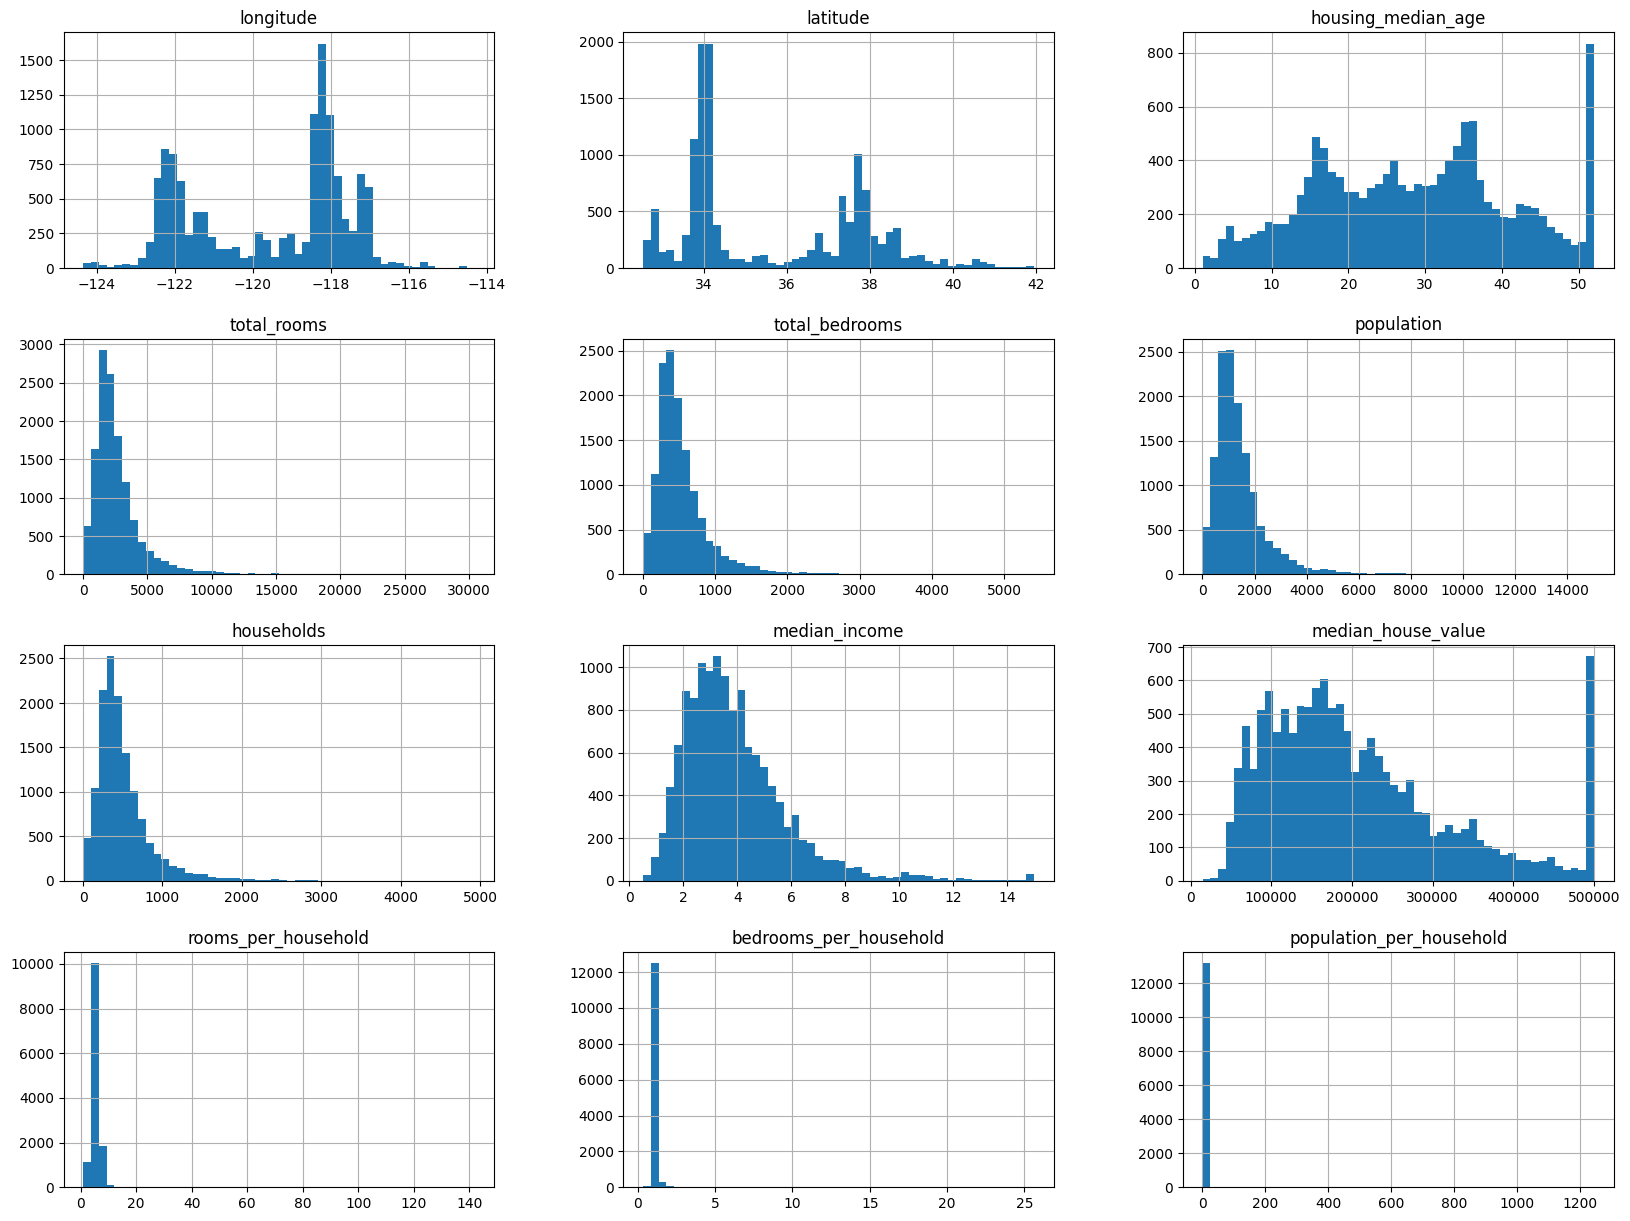

In [ ]:
train_df.hist(bins=50, figsize=(20, 15));

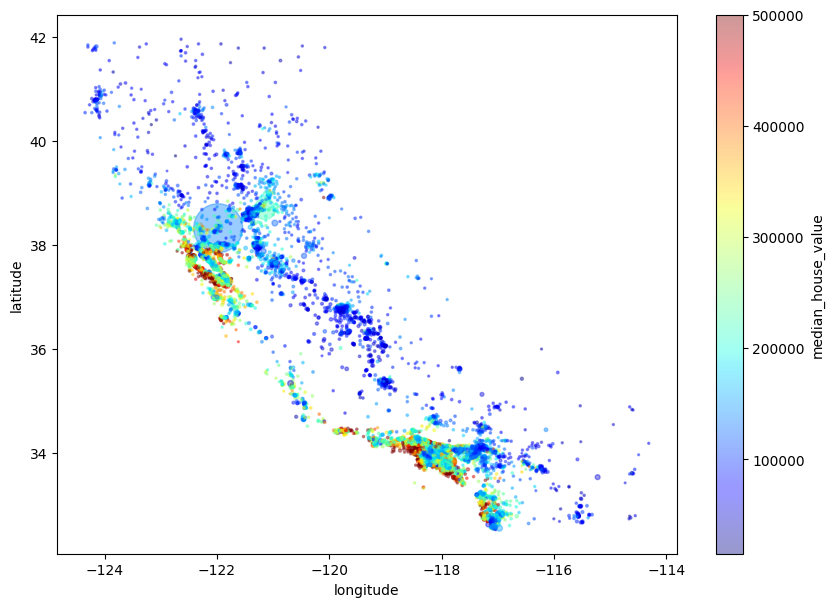

In [ ]:
train_df.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=train_df["population_per_household"],
    figsize=(10, 7),
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    sharex=False,
);

## **¿Qué transformaciones debemos aplicar a los datos?**

Esto es lo que podemos ver del EDA:

- Algunos valores faltantes en la columna `total_bedrooms`
- Las escalas de las columnas son bastante diferentes
- Tenemos una variable categórica `ocean_proximity`

Primero vamos a trabajar con las variables numéricas que no tienen valores nulos. Después incluiremos de nuevo la variable categórica.


In [ ]:
X_train = train_df.drop(columns=["median_house_value", "ocean_proximity", "total_bedrooms", "bedrooms_per_household"])
y_train = train_df["median_house_value"]

X_val = val_df.drop(columns=["median_house_value", "ocean_proximity", "total_bedrooms", "bedrooms_per_household"])
y_val = val_df["median_house_value"]

X_test = test_df.drop(columns=["median_house_value", "ocean_proximity", "total_bedrooms", "bedrooms_per_household"])
y_test = test_df["median_house_value"]

Vamos a entrenar nuestra regresión con $k-$NN con los datos sin preprocesamiento

In [ ]:
# Crear un clasificador KNN con diferentes números de vecinos
n_neighbors = [1,3,5,7,9,11,13,15]
det_coef = []

for k in n_neighbors:
  clf = Pipeline(steps=[("regressor", KNeighborsRegressor(n_neighbors=k))])

  # Entrenar el clasificador con los datos de entrenamiento
  clf.fit(X_train, y_train)

  # Evaluar el rendimiento del clasificador en los datos de validación
  det_coef.append(clf.score(X_val, y_val))

[Text(0.5, 0, 'Number of neighbors'),
 Text(0, 0.5, 'Determination Coefficient (%)'),
 Text(0.5, 1.0, 'k-NN Regression')]

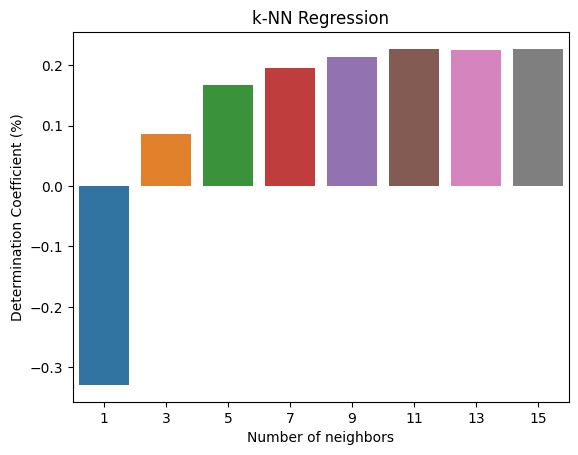

In [ ]:
gfg = sns.barplot(x = n_neighbors,y = det_coef)
gfg.set(xlabel ="Number of neighbors", ylabel = "Determination Coefficient (%)", title ='k-NN Regression')

In [ ]:
#Re-entrenar el modelo con los datos de entrenamiento y validación para el valor de k óptimo
k_opt = n_neighbors[np.argmax(det_coef)]
print(f"El número óptimo de vecinos es {k_opt}")
X_train_test = np.vstack([X_train,X_val])
y_train_test = np.hstack([y_train,y_val])

# Entrenar el regresor con los datos de entrenamiento
clf = Pipeline(steps=[("regressor", KNeighborsRegressor(n_neighbors=k_opt))])
clf.fit(X_train_test, y_train_test)
#Validar el rendimiento del clasificador con los datos de prueba
det_coef = clf.score(X_test, y_test)

print(f"El coeficiente de determinación en el conjunto de test es {det_coef:0.2f}")

El número óptimo de vecinos es 15
El coeficiente de determinación en el conjunto de test es 0.25


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


## **Imputación de datos**

La imputación de datos se utiliza para abordar valores faltantes en un conjunto de datos. Reemplaza los valores faltantes con valores estimados para permitir un análisis más completo y reducir el impacto de los valores faltantes en los resultados del análisis. La elección de la técnica de imputación depende del tipo de datos y la cantidad de valores faltantes, y en algunos casos puede ser necesario eliminar filas o columnas con valores faltantes.

¿Qué pasa si intentamos hacer la regresión sin tener en cuenta los valores nulos o faltantes?


In [ ]:
X_train = train_df.drop(columns=["median_house_value", "ocean_proximity"])
y_train = train_df["median_house_value"]

X_val = val_df.drop(columns=["median_house_value", "ocean_proximity"])
y_val = val_df["median_house_value"]

X_test = test_df.drop(columns=["median_house_value", "ocean_proximity"])
y_test = test_df["median_house_value"]

In [ ]:
# Crear un clasificador KNN con diferentes números de vecinos
n_neighbors = [1,3,5,7,9,11,13,15]
det_coef = []

for k in n_neighbors:
  clf = Pipeline(steps=[("regressor", KNeighborsRegressor(n_neighbors=k))])

  # Entrenar el clasificador con los datos de entrenamiento
  clf.fit(X_train, y_train)

  # Evaluar el rendimiento del clasificador en los datos de validación
  det_coef.append(clf.score(X_val, y_val))

ValueError: ignored

## ¿Cuál es el problema?

`ValueError: Input X contains NaN.`

- El regresor no puede manejar valores faltantes (NaN).
- ¿Cuáles son las posibles formas de abordar el problema?
  - ¿Eliminar las filas?
  - ¿Reemplazarlas con algunos valores razonables?

Para abordar los valores faltantes (NaN) en los datos y hacerlos compatibles con el clasificador, hay varias opciones. Una opción es eliminar las filas con valores faltantes si los datos faltantes no representan una cantidad significativa de los datos totales. Otra opción es reemplazar los valores faltantes con algún valor razonable, como la media o la mediana de la columna correspondiente, o un valor constante.

La elección de la opción depende del conjunto de datos y de la cantidad de valores faltantes. En general, es importante considerar cuidadosamente las implicaciones de cada opción y determinar la mejor opción para el análisis en cuestión.

- `SimpleImputer` es un transformador en `sklearn` que ayuda a resolver este problema. Por ejemplo:

  - Puede *imputar* valores faltantes en columnas categóricas con el valor más frecuente.
  - Puede *imputar* valores faltantes en numéricas con la `media` o `mediana` de la columna.

In [ ]:
X_train.sort_values("bedrooms_per_household")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_household,population_per_household
20248,-119.23,34.25,28.0,26.0,3.0,29.0,9.0,8.0000,2.888889,0.333333,3.222222
12649,-121.47,38.51,52.0,20.0,4.0,74.0,9.0,3.6250,2.222222,0.444444,8.222222
8219,-118.21,33.79,33.0,32.0,18.0,96.0,36.0,4.5938,0.888889,0.500000,2.666667
12138,-117.22,33.87,16.0,56.0,7.0,39.0,14.0,2.6250,4.000000,0.500000,2.785714
1419,-122.05,37.97,16.0,60.0,10.0,65.0,19.0,6.1359,3.157895,0.526316,3.421053
...,...,...,...,...,...,...,...,...,...,...,...
13311,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,5.251483,NaN,2.846975
19060,-122.41,38.16,37.0,1549.0,NaN,863.0,275.0,2.7457,5.632727,NaN,3.138182
19833,-119.38,36.53,38.0,1281.0,NaN,1423.0,293.0,1.9602,4.372014,NaN,4.856655
4043,-118.50,34.17,37.0,880.0,NaN,369.0,155.0,4.1429,5.677419,NaN,2.380645


In [ ]:
imputer = SimpleImputer(strategy="median")
imputer.fit(X_train)
X_train_imp = imputer.transform(X_train)
X_val_imp = imputer.transform(X_val)
X_test_imp = imputer.transform(X_test)

- Revisemos si los valores `NaN` se reemplazaron
- Note que `imputer.transform` devuelve un arreglo de `numpy` y no un `dataframe`

In [ ]:
pd.DataFrame(X_train_imp, columns=X_train.columns, index=X_train.index).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13209 entries, 17854 to 18303
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 13209 non-null  float64
 1   latitude                  13209 non-null  float64
 2   housing_median_age        13209 non-null  float64
 3   total_rooms               13209 non-null  float64
 4   total_bedrooms            13209 non-null  float64
 5   population                13209 non-null  float64
 6   households                13209 non-null  float64
 7   median_income             13209 non-null  float64
 8   rooms_per_household       13209 non-null  float64
 9   bedrooms_per_household    13209 non-null  float64
 10  population_per_household  13209 non-null  float64
dtypes: float64(11)
memory usage: 1.2 MB


Entrenemos el regresor incluyendo estas características

In [ ]:
# Crear un clasificador KNN con diferentes números de vecinos
n_neighbors = [1,3,5,7,9,11,13,15]
det_coef = []

for k in n_neighbors:
  clf = Pipeline(steps=[("regressor", KNeighborsRegressor(n_neighbors=k))])

  # Entrenar el clasificador con los datos de entrenamiento
  clf.fit(X_train_imp, y_train)

  # Evaluar el rendimiento del clasificador en los datos de validación
  det_coef.append(clf.score(X_val_imp, y_val))

[Text(0.5, 0, 'Number of neighbors'),
 Text(0, 0.5, 'Determination Coefficient (%)'),
 Text(0.5, 1.0, 'k-NN Regression')]

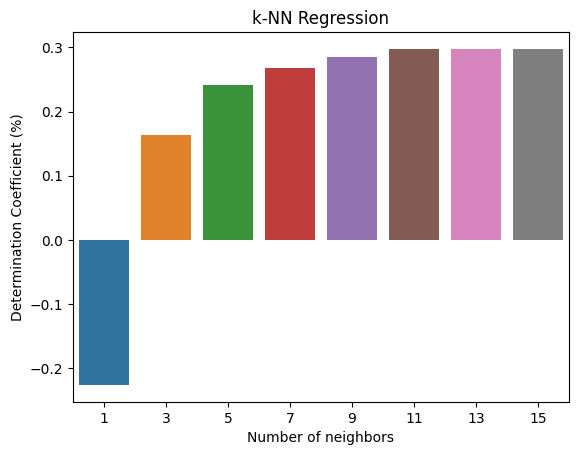

In [ ]:
gfg = sns.barplot(x = n_neighbors,y = det_coef)
gfg.set(xlabel ="Number of neighbors", ylabel = "Determination Coefficient (%)", title ='k-NN Regression')

In [ ]:
#Re-entrenar el modelo con los datos de entrenamiento y validación para el valor de k óptimo
k_opt = n_neighbors[np.argmax(det_coef)]
print(f"El número óptimo de vecinos es {k_opt}")
X_train_test_imp = np.vstack([X_train_imp,X_val_imp])
y_train_test = np.hstack([y_train,y_val])

# Entrenar el regresor con los datos de entrenamiento
clf = Pipeline(steps=[("regressor", KNeighborsRegressor(n_neighbors=k_opt))])
clf.fit(X_train_test_imp, y_train_test)
#Validar el rendimiento del clasificador con los datos de prueba
det_coef = clf.score(X_test_imp, y_test)

print(f"El coeficiente de determinación en el conjunto de test es {det_coef:0.2f}")

El número óptimo de vecinos es 13
El coeficiente de determinación en el conjunto de test es 0.30


¿Qué porcentaje de datos faltantes se puede imputar?

Chat-gpt: No hay una respuesta única a esta pregunta, ya que depende del tipo de datos y de la cantidad de valores faltantes en el conjunto de datos. En general, se recomienda tener cuidado al imputar valores faltantes y no imputar más del 5-10% de los datos totales. Si hay una gran cantidad de valores faltantes, la imputación puede no ser adecuada y es posible que deba considerar eliminar filas o columnas con valores faltantes o usar técnicas de modelado que puedan manejar valores faltantes de manera efectiva.

También es importante tener en cuenta que la imputación puede introducir sesgos en los datos y afectar los resultados del análisis. Por lo tanto, es importante evaluar cuidadosamente la calidad de los datos imputados y considerar si la imputación es necesaria y apropiada para el análisis en cuestión.

## **Escalamiento**

- Este problema afecta a un número considerable de algoritmos de ML.
- Hay diferentes formas de afrentar este problema, vamos a considerar las más utilizadas

| Técnica | ¿Qué hace? | Cómo actualiza $X$ | Implementación en sklearn |
|---------|------------|-----------------------|----------------|
| Estandarización | Convierte la media de cada columna a $0$, y la s.d. to $1$   | `X -= np.mean(X,axis=0)`<br>`X /=  np.std(X,axis=0)` | [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) |
| MinMax | Deja el valor mínimo en 0 y el valor máximo en 1 | `X -= np.min(X,axis=0)`<br>`X /=  np.max(X,axis=0)` | [`MinMaxScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) |

Hay muchos artículos donde se discute este tema a fondo; puede consultar [en este link](http://www.dataminingblog.com/standardization-vs-normalization/) y [en este link](https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc).

![Scaling](https://drive.google.com/uc?id=1K7ihL7Fgv30r3xuJyZxnVe7tunqpG7Dv)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
X_train = train_df.drop(columns=["median_house_value", "ocean_proximity"])
y_train = train_df["median_house_value"]

X_val = val_df.drop(columns=["median_house_value", "ocean_proximity"])
y_val = val_df["median_house_value"]

X_test = test_df.drop(columns=["median_house_value", "ocean_proximity"])
y_test = test_df["median_house_value"]

In [ ]:
imputer = SimpleImputer(strategy="median")
imputer.fit(X_train)
X_train_imp = imputer.transform(X_train)
X_val_imp = imputer.transform(X_val)
X_test_imp = imputer.transform(X_test)

In [ ]:
scaler = StandardScaler()
X_train_imp_scaled = scaler.fit_transform(X_train_imp)
X_val_imp_scaled = scaler.transform(X_val_imp)
X_test_imp_scaled = scaler.transform(X_test_imp)
pd.DataFrame(X_train_imp_scaled, columns=X_train.columns)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_household,population_per_household
0,-1.159335,0.857026,-1.877350,-0.524079,-0.844724,-0.664114,-0.829604,3.395843,1.170051,-0.223054,0.067133
1,0.853958,-0.874461,-1.081706,-0.832481,-0.580594,-0.100168,-0.652057,-0.546466,-0.879506,0.176602,0.196996
2,-0.884568,1.427949,-0.047369,0.334644,0.026191,0.096896,0.136457,0.208175,0.280941,-0.240038,-0.025045
3,1.288590,-0.799586,-0.206498,-0.993145,-1.123132,-1.038262,-1.161198,-0.087333,1.322719,0.177075,0.173898
4,-0.874576,1.301598,-0.922577,0.806480,0.271285,0.484666,0.353168,1.017217,0.625629,-0.163943,0.002901
...,...,...,...,...,...,...,...,...,...,...,...
13204,0.569200,-0.743430,1.862176,-0.402657,-0.554419,-0.636870,-0.513676,0.741289,0.164860,-0.215365,-0.059645
13205,-1.334187,1.016136,1.464354,-0.280774,0.111855,-0.202786,0.131235,-0.650729,-0.733651,-0.078170,-0.078224
13206,1.228641,-1.347111,-0.683884,-0.455750,-0.171311,-0.131044,-0.153361,-0.932609,-0.711128,-0.095732,-0.013405
13207,0.604170,-0.832344,0.589146,-0.583636,-0.740024,-0.684093,-0.743441,0.529944,0.395708,-0.104477,0.006150


In [ ]:
# Crear un clasificador KNN con diferentes números de vecinos
n_neighbors = [1,3,5,7,9,11,13,15]
det_coef = []

for k in n_neighbors:
  clf = Pipeline(steps=[("regressor", KNeighborsRegressor(n_neighbors=k))])

  # Entrenar el clasificador con los datos de entrenamiento
  clf.fit(X_train_imp_scaled, y_train)

  # Evaluar el rendimiento del clasificador en los datos de validación
  det_coef.append(clf.score(X_val_imp_scaled, y_val))

In [ ]:
#Re-entrenar el modelo con los datos de entrenamiento y validación para el valor de k óptimo
k_opt = n_neighbors[np.argmax(det_coef)]
print(f"El número óptimo de vecinos es {k_opt}")
X_train_test_imp_scaled = np.vstack([X_train_imp_scaled,X_val_imp_scaled])
y_train_test = np.hstack([y_train,y_val])

# Entrenar el regresor con los datos de entrenamiento
clf = Pipeline(steps=[("regressor", KNeighborsRegressor(n_neighbors=k_opt))])
clf.fit(X_train_test_imp_scaled, y_train_test)
#Validar el rendimiento del clasificador con los datos de prueba
det_coef = clf.score(X_test_imp_scaled, y_test)

print(f"El coeficiente de determinación en el conjunto de test es {det_coef:0.2f}")

El número óptimo de vecinos es 13
El coeficiente de determinación en el conjunto de test es 0.73


## **Vamos a utilizar `Pipelines` para simplificar el proceso**

Los `pipelines` permiten hacer este proceso de una forma más elegante y organizada

In [ ]:
X_train = train_df.drop(columns=["median_house_value", "ocean_proximity"])
y_train = train_df["median_house_value"]

X_val = val_df.drop(columns=["median_house_value", "ocean_proximity"])
y_val = val_df["median_house_value"]

X_test = test_df.drop(columns=["median_house_value", "ocean_proximity"])
y_test = test_df["median_house_value"]

```
pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("regressor", KNeighborsRegressor()),
    ]
)
```

- Sintaxis: Pasamos una lista de pasos
- El último paso debe ser un modelo de **clasificación/regresión**
- Los pasos anteriores deben ser **transformaciones**

In [ ]:
pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("regressor", KNeighborsRegressor()),
    ]
)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('regressor', KNeighborsRegressor())])

- Note que estamos pasando `X_train` y **no** la versión imputada o escalada.

- Cuando llamamos el método `fit` en el pipeline, este ejecuta los siguientes pasos:

  - Ajusta `SimpleImputer` en `X_train`
  - Transforma `X_train` usando el `SimpleImputer` ajustado para crear `X_train_imp`
  - Ajusta `StandardScaler` en `X_train_imp`
  - Transforma `X_train_imp` usando el `StandardScaler` ajustado para crear `X_train_imp_scaled`
  - Ajusta el modelo de regresión `KNeighborsRegressor` en `X_train_imp_scaled`

![Scaling](https://drive.google.com/uc?id=1Ne1b8pelUy0BaeLOjWl3DN7vc-rKEhBs)





In [ ]:
# Crear un clasificador KNN con diferentes números de vecinos
n_neighbors = [1,3,5,7,9,11,13,15]
det_coef = []

for k in n_neighbors:
  clf = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("regressor", KNeighborsRegressor(k)),
    ])
  # Entrenar el clasificador con los datos de entrenamiento
  clf.fit(X_train, y_train)

  # Evaluar el rendimiento del clasificador en los datos de validación
  det_coef.append(clf.score(X_val, y_val))

In [ ]:
#Re-entrenar el modelo con los datos de entrenamiento y validación para el valor de k óptimo
k_opt = n_neighbors[np.argmax(det_coef)]
print(f"El número óptimo de vecinos es {k_opt}")
X_train_test = np.vstack([X_train,X_val])
y_train_test = np.hstack([y_train,y_val])

# Entrenar el regresor con los datos de entrenamiento
clf = Pipeline(
  steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("regressor", KNeighborsRegressor(k_opt)),
      ])
clf.fit(X_train_test, y_train_test)
#Validar el rendimiento del clasificador con los datos de prueba
det_coef = clf.score(X_test, y_test)

print(f"El coeficiente de determinación en el conjunto de test es {det_coef:0.2f}")

El número óptimo de vecinos es 13


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


El coeficiente de determinación en el conjunto de test es 0.73


## **Variables categóricas**

- Recuerde que no estamos utilizando la variable categórica `ocean_proximity` del `dataframe`. Sin embargo, esta característica podría ayudarnos a mejorar la estimación del precio de las casas.

- Creemos de nuevo `X_train`, `X_val` y `X_test` conservando esta variable

In [ ]:
X_train = train_df.drop(columns=["median_house_value"])
y_train = train_df["median_house_value"]

X_val = val_df.drop(columns=["median_house_value"])
y_val = val_df["median_house_value"]

X_test = test_df.drop(columns=["median_house_value"])
y_test = test_df["median_house_value"]

Intenemos construir un `KNeighborRegressor` en estos datos usando nuestro `pipeline`

In [ ]:
pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
        ("regressor", KNeighborsRegressor()),
    ]
)

In [ ]:
pipe.fit(X_train, y_train)

ValueError: ignored

- Esto falla porque tenemos datos no-numéricos
- ¿Cómo calcularíamos distancias cuando tenemos datos no-numéricos?

## ¿Podemos usar estos datos en nuestro modelo?

- En `scikit-learn`, la mayoría de los algoritmos requieren entradas numéricas.
- En teoría, los árboles de decisión podrían trabajar con variables categóricas, sin embargo, la implementación en `scikit-learn` no soporta este tipo de datos.

## ¿Qué opciones tenemos?

- Eliminar la columna (no recomendado)
  - Si sabes que la columna no es relevante para predecir la variable objetivo, se puede eliminar.
- Podemos transformar las variables categóricas en variables numéricas de forma que se puedan utilizar en el modelo.
 - `OrdinalEncoding:` Asigna un entero a cada una de las categorías que puede tomar la variable (recomendado ocasionalmente por ejemplo en árboles de decisión).
 - `OneHotEncoding:` Crea tantas nuevas variables como categorías en la variable a transformar (recomendado en la mayoría de los casos). Si tenemos $c$ categorías en nuestra columna, creamos $c$ nuevas columnas binarias para representar estas categorías.  

| Índice | Color   |
|--------|---------|
| 0      | Rojo    |
| 1      | Azul    |
| 2      | Verde   |
| 3      | Azul    |
| 4      | Rojo    |
| 5      | Verde   |

Después de aplicar el `OrdinalEncoding` a la variable categórica `Color`, la tabla resultante se vería así:

| Índice | Color_ordinal |
|--------|---------------|
| 0      | 1             |
| 1      | 2             |
| 2      | 3             |
| 3      | 2             |
| 4      | 1             |
| 5      | 3             |

Después de aplicar el `OneHotEncoding` a la variable categórica `Color`, la tabla resultante se vería así:

| Índice | Color_Rojo | Color_Azul | Color_Verde |
|--------|------------|------------|-------------|
| 0      | 1          | 0          | 0           |
| 1      | 0          | 1          | 0           |
| 2      | 0          | 0          | 1           |
| 3      | 0          | 1          | 0           |
| 4      | 1          | 0          | 0           |
| 5      | 0          | 0          | 1           |

Vamos a aplicar `OneHotEncoding` a nuestros datos

In [ ]:
ohe = OneHotEncoder(sparse_output=False, dtype="int")
ohe.fit(X_train[["ocean_proximity"]])
X_imp_ohe_train = ohe.transform(X_train[["ocean_proximity"]])

Podemos mirar las nuevas características creadas usando el atributo `categories_`

In [ ]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
transformed_ohe = pd.DataFrame(
    data=X_imp_ohe_train,
    columns=ohe.get_feature_names_out(["ocean_proximity"]),
    index=X_train.index,
)
transformed_ohe

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17854,1,0,0,0,0
10905,1,0,0,0,0
12881,0,1,0,0,0
12280,0,1,0,0,0
13104,0,1,0,0,0
...,...,...,...,...,...
5344,1,0,0,0,0
177,0,0,0,1,0
14108,0,0,0,0,1
8711,1,0,0,0,0


Las variables generadas con `OneHotEncoding` se conocen comunmente como **dummy variables**. A menudo se utiliza el método [`get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) de pandas para convertir las variables categóricas en variabes **dummy**. Sin embargo, usar el transformador `OneHotEncoder` de `scikit-learn` tiene la ventaja de hacer el procedimiento fácil de tratar en particiones de entrenamiento, validación y prueba de una forma consistente.

## **`ColumnTransformers` de `scikit-learn`**

- En la mayoría de aplicaciones tenemos variables categóricas, continuas, binarias uy/o ordinales.

- Cuando queremos desarrollar `pipelines` de aprendizaje de máquina en bases de datos reales, a menudo, queremos aplicar diferentes transformaciones a diferentes columnas.

- Para este ejemplo deberíamos aplicar:

 - Imputación, escalamiento en las variabes numéricas.
 - One-hot-encoding en la variable categórica

In [ ]:
X_train = train_df.drop(columns=["median_house_value"])
y_train = train_df["median_house_value"]

X_val = val_df.drop(columns=["median_house_value"])
y_val = val_df["median_house_value"]

X_test = test_df.drop(columns=["median_house_value"])
y_test = test_df["median_house_value"]

Vamos a encontrar las variables numéricas y categóricas en nuestros datos

In [ ]:
cat_cols = X_train.select_dtypes(include=object).columns
num_cols = X_train.select_dtypes(include=np.number).columns

Ahora vamos a crear un `ColumnTransformer`

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

In [ ]:
transformed = preprocessor.fit_transform(X_train)

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_household',
       'population_per_household'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['ocean_proximity'], dtype='object'))])

- Cuando aplicamos `fit`, cada `transformer` se aplica a las columnas especificadas y el resultado de las transformaciones se concatena de forma horizontal.

- Una ventaja es que creamos nuestras transformaciones en un solo objeto, de esta forma, nos aseguramos que se aplique el mismo procedimiento a las diferentes particiones de los datos.

¿Cómo vemos los datos transformados como un `dataframe`?

- Estamos agregando más columnas, así que las columnas originales no coinciden con los datos transformados.
- Creemos nombres de columnas para los nuevos datos

In [ ]:
column_names = (
    num_cols.to_list()
    + preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out().tolist()
)
column_names

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_household',
 'population_per_household',
 'ocean_proximity_<1H OCEAN',
 'ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN']

In [ ]:
preprocessor.named_transformers_

{'num': Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                 ('scaler', StandardScaler())]),
 'cat': Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])}

In [ ]:
pd.DataFrame(transformed, columns=column_names)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_household,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.159335,0.857026,-1.877350,-0.524079,-0.844724,-0.664114,-0.829604,3.395843,1.170051,-0.223054,0.067133,1.0,0.0,0.0,0.0,0.0
1,0.853958,-0.874461,-1.081706,-0.832481,-0.580594,-0.100168,-0.652057,-0.546466,-0.879506,0.176602,0.196996,1.0,0.0,0.0,0.0,0.0
2,-0.884568,1.427949,-0.047369,0.334644,0.026191,0.096896,0.136457,0.208175,0.280941,-0.240038,-0.025045,0.0,1.0,0.0,0.0,0.0
3,1.288590,-0.799586,-0.206498,-0.993145,-1.123132,-1.038262,-1.161198,-0.087333,1.322719,0.177075,0.173898,0.0,1.0,0.0,0.0,0.0
4,-0.874576,1.301598,-0.922577,0.806480,0.271285,0.484666,0.353168,1.017217,0.625629,-0.163943,0.002901,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13204,0.569200,-0.743430,1.862176,-0.402657,-0.554419,-0.636870,-0.513676,0.741289,0.164860,-0.215365,-0.059645,1.0,0.0,0.0,0.0,0.0
13205,-1.334187,1.016136,1.464354,-0.280774,0.111855,-0.202786,0.131235,-0.650729,-0.733651,-0.078170,-0.078224,0.0,0.0,0.0,1.0,0.0
13206,1.228641,-1.347111,-0.683884,-0.455750,-0.171311,-0.131044,-0.153361,-0.932609,-0.711128,-0.095732,-0.013405,0.0,0.0,0.0,0.0,1.0
13207,0.604170,-0.832344,0.589146,-0.583636,-0.740024,-0.684093,-0.743441,0.529944,0.395708,-0.104477,0.006150,1.0,0.0,0.0,0.0,0.0



![Scaling](https://drive.google.com/uc?id=1aRW-189rN4CXm7Y2MQPxDtbEgH8huBY6)


## **Entrenamiento del modelo**


In [ ]:
# Cargar los datos
housing_df = pd.read_csv("housing.csv")
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#Particiones
train_df, test_df = train_test_split(housing_df, test_size=0.20, random_state=123)
train_df, val_df = train_test_split(train_df, test_size = 0.20, random_state=123)

In [ ]:
#Creación de nuevas variables
train_df = train_df.assign(
    rooms_per_household=train_df["total_rooms"] / train_df["households"]
)

val_df = val_df.assign(
    rooms_per_household=val_df["total_rooms"] / val_df["households"]
)

test_df = test_df.assign(
    rooms_per_household=test_df["total_rooms"] / test_df["households"]
)

train_df = train_df.assign(
    bedrooms_per_household=train_df["total_bedrooms"] / train_df["households"]
)

val_df = val_df.assign(
    bedrooms_per_household=val_df["total_bedrooms"] / val_df["households"]
)

test_df = test_df.assign(
    bedrooms_per_household=test_df["total_bedrooms"] / test_df["households"]
)

train_df = train_df.assign(
    population_per_household=train_df["population"] / train_df["households"]
)

val_df = val_df.assign(
    population_per_household=val_df["population"] / val_df["households"]
)

test_df = test_df.assign(
    population_per_household=test_df["population"] / test_df["households"]
)

In [ ]:
#Definir características y variable objetivo
X_train = train_df.drop(columns=["median_house_value"])
y_train = train_df["median_house_value"]

X_val = val_df.drop(columns=["median_house_value"])
y_val = val_df["median_house_value"]

X_test = test_df.drop(columns=["median_house_value"])
y_test = test_df["median_house_value"]

In [ ]:
#Encontrar variables numéricas y categóricas
cat_cols = X_train.select_dtypes(include=object).columns
num_cols = X_train.select_dtypes(include=np.number).columns

In [ ]:
#Definir el pipeline de pre-procesamiento
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

In [ ]:
# Crear un clasificador KNN con diferentes números de vecinos
n_neighbors = [1,3,5,7,9,11,13,15]
det_coef = []

for k in n_neighbors:
  clf = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", KNeighborsRegressor(k))])
  # Entrenar el clasificador con los datos de entrenamiento
  clf.fit(X_train, y_train)
  # Evaluar el rendimiento del clasificador en los datos de validación
  det_coef.append(clf.score(X_val, y_val))

[Text(0.5, 0, 'Number of neighbors'),
 Text(0, 0.5, 'Determination Coefficient (%)'),
 Text(0.5, 1.0, 'k-NN Regression')]

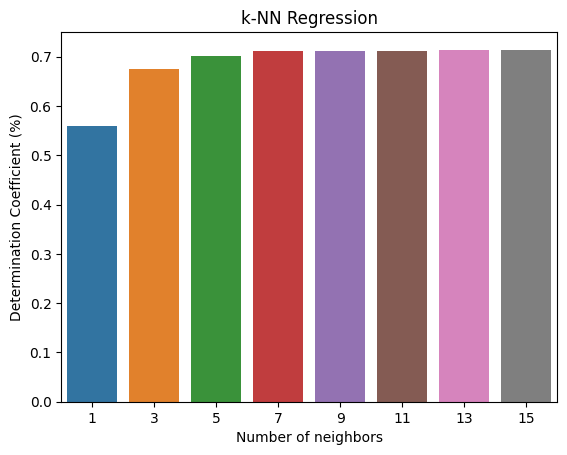

In [ ]:
#Gráfica para selección del hiperparámetro
gfg = sns.barplot(x = n_neighbors,y = det_coef)
gfg.set(xlabel ="Number of neighbors", ylabel = "Determination Coefficient (%)", title ='k-NN Regression')

In [ ]:
#Re-entrenar el modelo con los datos de entrenamiento y validación para el valor de k óptimo
k_opt = n_neighbors[np.argmax(det_coef)]
print(f"El número óptimo de vecinos es {k_opt}")
X_train_test = pd.concat([X_train,X_val],axis=0)
y_train_test = np.hstack([y_train,y_val])
clf = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", KNeighborsRegressor(k_opt))])
# Entrenar el clasificador con los datos de entrenamiento
clf.fit(X_train_test, y_train_test)
det_coef = clf.score(X_test, y_test)
print(f"El coeficiente de determinación en el conjunto de test es {det_coef:0.2f}")

El número óptimo de vecinos es 15
El coeficiente de determinación en el conjunto de test es 0.74


## **¿Qué aprendimos hoy?**

- Motivación para el preprocesamiento de datos
- Técnicas comunes de preprocesamiento:
  - Imputación
  - Escalamiento
  - OneHotEncoding
- Aplicar diferentes transformaciones a diferentes columnas
